In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#path = "../Reources/Crash_Statistics_Victoria_clean.csv" 
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3402184,15/07/2013,09.00.00,No,Collision with vehicle,Monday,Day,Cross intersection,Serious injury accident,50 km/hr,...,0,No,0,2,0,2,0,0,Arterial Highway,Country
1,3402219,19/07/2013,12.40.00,No,Collision with a fixed object,Friday,Day,Not at intersection,Serious injury accident,50 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Country
2,3404429,19/08/2013,18.55.00,Yes,Collision with a fixed object,Sunday,Dark Street lights on,Cross intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Arterial Highway,Country
3,3404496,26/08/2013,09.45.00,No,Vehicle overturned (no collision),Monday,Day,Not at intersection,Serious injury accident,100 km/hr,...,0,No,0,2,0,2,0,0,Local Road,Country
4,3404960,23/10/2013,16.15.00,No,No collision and no object struck,Wednesday,Day,Not at intersection,Other injury accident,Not known,...,0,No,0,1,0,0,1,0,Local Road,Country


In [3]:
#check dimensions
crash_data.shape

(65435, 47)

In [4]:
#check missing values
crash_data.isnull().sum()

OBJECTID                0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          1146
LIGHT_CONDITION         0
ROAD_GEOMETRY           0
SEVERITY                0
SPEED_ZONE              0
NODE_ID                 0
LONGITUDE               0
LATITUDE                0
NODE_TYPE               6
LGA_NAME                0
REGION_NAME             0
VICGRID_X               0
VICGRID_Y               0
TOTAL_PERSONS           0
INJ_OR_FATAL            0
FATALITY                0
SERIOUSINJURY           0
OTHERINJURY             0
NONINJURED              0
MALES                   0
FEMALES                 0
BICYCLIST               0
PASSENGER               0
DRIVER                  0
PEDESTRIAN              0
PILLION                 0
MOTORIST                0
UNKNOWN                 0
PED_CYCLIST_5_12        0
PED_CYCLIST_13_18       0
OLD_PEDESTRIAN          0
OLD_DRIVER              0
YOUNG_DRIVER            0
ALCOHOL_RELA

In [5]:
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

In [6]:
#check missing values
crash_data.isnull().sum()


OBJECTID             0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
NODE_ID              0
LONGITUDE            0
LATITUDE             0
NODE_TYPE            0
LGA_NAME             0
REGION_NAME          0
VICGRID_X            0
VICGRID_Y            0
TOTAL_PERSONS        0
INJ_OR_FATAL         0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
UNKNOWN              0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE 

In [7]:
#check data dimensions
crash_data.shape

(63037, 47)

In [8]:
crash_data.sample(10)

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
31547,3431187,3/09/2015,08.45.00,No,Collision with vehicle,Thursday,Day,T intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,2,0,0,Local Road,Country
47524,3415476,14/07/2014,15.10.00,No,Collision with vehicle,Monday,Day,Cross intersection,Other injury accident,90 km/hr,...,0,No,0,2,0,2,0,0,Arterial Other,Metro
12845,3447040,26/08/2016,11.27.00,No,Collision with vehicle,Friday,Day,Y intersection,Serious injury accident,80 km/hr,...,0,No,0,2,0,2,0,0,Freeway,Metro
35964,3408153,1/12/2013,00.40.00,Yes,Collision with vehicle,Sunday,Dark Street lights on,T intersection,Other injury accident,60 km/hr,...,0,No,0,2,0,2,0,0,Arterial Other,Metro
33373,3464984,22/01/2018,19.30.00,Yes,Struck Pedestrian,Monday,Day,T intersection,Other injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Arterial Other,Metro
52510,3459079,20/09/2017,15.55.00,No,Collision with vehicle,Wednesday,Day,T intersection,Other injury accident,60 km/hr,...,1,No,0,2,0,2,0,0,Local Road,Country
40951,3402357,20/07/2013,13.30.00,No,Collision with a fixed object,Saturday,Day,Not at intersection,Serious injury accident,100 km/hr,...,0,No,0,1,0,1,0,0,Arterial Highway,Country
13387,3459672,7/09/2017,22.00.00,Yes,Collision with a fixed object,Thursday,Dark No street lights,Not at intersection,Other injury accident,80 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
11616,3417534,13/08/2014,10.00.00,No,Collision with vehicle,Wednesday,Day,Cross intersection,Other injury accident,80 km/hr,...,0,No,0,2,0,2,0,0,Arterial Other,Metro
17705,3440184,15/03/2016,18.25.00,Yes,Collision with vehicle,Tuesday,Dusk/Dawn,Cross intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,0,Arterial Other,Metro


In [9]:
#load local government expenditure data, skip first row
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)
localgov.head(10)

,LGA_NAME,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure
0,Alpine,412.0,233.0,215.0,860.0,3748129.0,265116.0,0.0,0.0,4013244.0
1,Ararat,764.0,1420.0,240.0,2424.0,7303459.0,2975868.0,2281.0,1361455.0,11845829.0
2,Ballarat,1044.0,351.0,40.0,1435.0,41874084.0,3196942.0,363289.0,1045194.0,46775611.0
3,Banyule,538.0,6.0,1.0,545.0,10329600.0,0.0,0.0,0.0,10329600.0
4,Bass Coast,563.0,373.0,7.0,943.0,7355926.0,1677983.0,0.0,789457.0,9923525.0
5,Baw Baw,1110.0,721.0,184.0,2015.0,13512590.0,3092182.0,0.0,1493686.0,19073493.0
6,Bayside,355.0,1.0,0.0,356.0,5547236.0,0.0,0.0,6045707.0,11592943.0
7,Benalla,560.0,713.0,78.0,1351.0,2504772.0,1474785.0,0.0,0.0,3979557.0
8,Boroondara,562.0,0.0,0.0,562.0,11436082.0,0.0,0.0,0.0,11436082.0
9,Brimbank,889.0,5.0,0.0,894.0,25715082.0,344474.0,0.0,1997635.0,28078056.0


In [10]:
#check dimensions
localgov.shape

(79, 10)

In [11]:
#check null values
localgov.isnull().sum()

LGA_NAME                                                  0
Local Roads - Sealed-length                               0
Local Roads - Unsealed - Formed &  Sheeted-length         0
Local Roads - Unsealed - Natural Surface_length           0
Total_roadlength                                          0
Local Roads - Sealed-expenditure                          0
Local Roads - Unsealed - Formed &  Sheeted-expenditure    0
Local Roads - Unsealed - Natural Surface-expenditure      0
Roads Ancillary-expenditure                               0
Total-expenditure                                         0
dtype: int64

In [12]:
#unique lGA names on crash dataset
crash_data["LGA_NAME"].nunique()


79

In [13]:
#unique lGA names on local gov dataset
localgov["LGA_NAME"].nunique()


79

In [14]:
localgov.dtypes

LGA_NAME                                                   object
Local Roads - Sealed-length                               float64
Local Roads - Unsealed - Formed &  Sheeted-length         float64
Local Roads - Unsealed - Natural Surface_length           float64
Total_roadlength                                          float64
Local Roads - Sealed-expenditure                          float64
Local Roads - Unsealed - Formed &  Sheeted-expenditure    float64
Local Roads - Unsealed - Natural Surface-expenditure      float64
Roads Ancillary-expenditure                               float64
Total-expenditure                                         float64
dtype: object

In [15]:
localgov["Expense_per_km"] = localgov["Total-expenditure"] / localgov["Total_roadlength"]  
localgov.head()

,LGA_NAME,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure,Expense_per_km
0,Alpine,412.0,233.0,215.0,860.0,3748129.0,265116.0,0.0,0.0,4013244.0,4666.562791
1,Ararat,764.0,1420.0,240.0,2424.0,7303459.0,2975868.0,2281.0,1361455.0,11845829.0,4886.893152
2,Ballarat,1044.0,351.0,40.0,1435.0,41874084.0,3196942.0,363289.0,1045194.0,46775611.0,32596.244599
3,Banyule,538.0,6.0,1.0,545.0,10329600.0,0.0,0.0,0.0,10329600.0,18953.394495
4,Bass Coast,563.0,373.0,7.0,943.0,7355926.0,1677983.0,0.0,789457.0,9923525.0,10523.356310


In [16]:
LGA_list = localgov["LGA_NAME"]
LGA_list

0           Alpine 
1           Ararat 
2         Ballarat 
3          Banyule 
4       Bass Coast 
          ...      
74         Wodonga 
75         Wyndham 
76           Yarra 
77    Yarra Ranges 
78    Yarriambiack 
Name: LGA_NAME, Length: 79, dtype: object

In [17]:
print(type(LGA_list))

<class 'pandas.core.series.Series'>


In [18]:
#df.groupby('Company Name')['Amount'].agg(['sum','count'])
num_accident_perLGA= crash_data.groupby('LGA_NAME')['OBJECTID'].agg('count').reset_index()
num_accident_perLGA

,LGA_NAME,OBJECTID
0,ALPINE,227
1,ARARAT,150
2,BALLARAT,1134
3,BANYULE,909
4,BASS COAST,340
...,...,...
74,WODONGA,267
75,WYNDHAM,1385
76,YARRA,1564
77,YARRA RANGES,1860


In [19]:
print(type(num_accident_perLGA))

<class 'pandas.core.frame.DataFrame'>


In [20]:
expense_per_km = localgov["Expense_per_km"]
expense_per_km

0      4666.562791
1      4886.893152
2     32596.244599
3     18953.394495
4     10523.356310
          ...     
74    10772.434263
75    21490.417843
76    51328.703704
77    23913.816990
78     1764.535159
Name: Expense_per_km, Length: 79, dtype: float64

In [70]:
total_expenditure = localgov["Total-expenditure"]

In [92]:
total_roadlength = localgov["Total_roadlength"]

In [93]:
#expense_per_km = pd.Series(expense_per_km)
lga_stats = pd.concat([num_accident_perLGA, expense_per_km, total_expenditure, total_roadlength], axis = 1)
lga_stats 


,LGA_NAME,OBJECTID,Expense_per_km,Total-expenditure,Total_roadlength
0,ALPINE,227,4666.562791,4013244.0,860.0
1,ARARAT,150,4886.893152,11845829.0,2424.0
2,BALLARAT,1134,32596.244599,46775611.0,1435.0
3,BANYULE,909,18953.394495,10329600.0,545.0
4,BASS COAST,340,10523.356310,9923525.0,943.0
...,...,...,...,...,...
74,WODONGA,267,10772.434263,5407762.0,502.0
75,WYNDHAM,1385,21490.417843,33482071.0,1558.0
76,YARRA,1564,51328.703704,11087000.0,216.0
77,YARRA RANGES,1860,23913.816990,41944835.0,1754.0


In [50]:
lga_stats.shape

(79, 3)

In [51]:
lga_stats.dtypes

LGA_NAME           object
OBJECTID            int64
Expense_per_km    float64
dtype: object

In [94]:
lga_stats = lga_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=["Expense_per_km", "OBJECTID", "Total-expenditure", "Total_roadlength"])

In [95]:
lga_stats

,LGA_NAME,OBJECTID,Expense_per_km,Total-expenditure,Total_roadlength
0,ALPINE,227,4666.562791,4013244.0,860.0
1,ARARAT,150,4886.893152,11845829.0,2424.0
2,BALLARAT,1134,32596.244599,46775611.0,1435.0
3,BANYULE,909,18953.394495,10329600.0,545.0
4,BASS COAST,340,10523.356310,9923525.0,943.0
...,...,...,...,...,...
74,WODONGA,267,10772.434263,5407762.0,502.0
75,WYNDHAM,1385,21490.417843,33482071.0,1558.0
76,YARRA,1564,51328.703704,11087000.0,216.0
77,YARRA RANGES,1860,23913.816990,41944835.0,1754.0


In [75]:
#calculate correlation coffecient

round(st.pearsonr(lga_stats["Expense_per_km"],lga_stats["OBJECTID"])[0],2)

0.04

In [77]:
#calculate correlation coffecient

round(st.pearsonr(lga_stats["Total-expenditure"],lga_stats["OBJECTID"])[0],2)

-0.01

In [78]:
x_values1 = lga_stats["Expense_per_km"]
y_values1 = lga_stats["OBJECTID"] 

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
print("slope", slope)
print("intercept", intercept)
print(x_values1 * slope + intercept)

slope 0.0015323304038646058
intercept 760.7654242141002
0     767.916140
1     768.253759
2     810.713641
3     789.808287
4     776.890683
         ...    
74    777.272353
75    793.695845
76    839.417957
77    797.409293
78    763.469275
Name: Expense_per_km, Length: 78, dtype: float64


In [83]:
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,4))
print(line_eq)

y = 0.0x + 760.7654


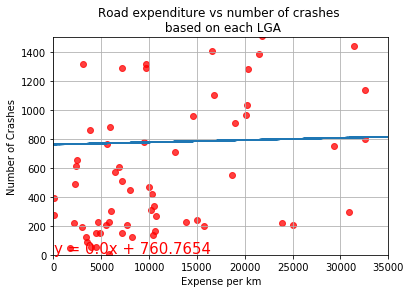

In [84]:
plt.scatter(x_values1,y_values1, facecolors = "red", alpha = 0.75)
plt.plot(x_values1, regress_values,"--")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Expense per km')
plt.ylabel('Number of Crashes')
plt.title("Road expenditure vs number of crashes \n based on each LGA")
plt.xlim(0,35000)
plt.ylim(0,1500)
plt.grid()
plt.show()

In [87]:
x_values2 = lga_stats["Total-expenditure"]
y_values2 = lga_stats["OBJECTID"] 


In [88]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
print("slope", slope)
print("intercept", intercept)
print(x_values2 * slope + intercept)

slope -5.469962012630823e-07
intercept 790.6491524987595
0     788.453923
1     784.169529
2     765.063071
3     784.998901
4     785.221022
         ...    
74    787.691127
75    772.334587
76    784.584606
77    767.705487
78    785.995952
Name: Total-expenditure, Length: 78, dtype: float64


In [89]:
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.0x + 790.65


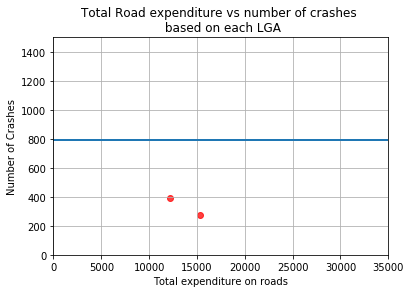

In [91]:
plt.scatter(x_values2,y_values2, facecolors = "red", alpha = 0.75)
plt.plot(x_values2, regress_values,"--")

#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total expenditure on roads')
plt.ylabel('Number of Crashes')
plt.title("Total Road expenditure vs number of crashes \n based on each LGA")
plt.xlim(0,35000)
plt.ylim(0,1500)
plt.grid()
plt.show()

In [100]:
round(st.pearsonr(lga_stats["Total_roadlength"],lga_stats["OBJECTID"])[0],2)

-0.12

slope -0.07277851453235504
intercept 901.7654113034554
0     839.175889
1     725.350292
2     797.328243
3     862.101121
4     833.135272
         ...    
74    865.230597
75    788.376486
76    886.045252
77    774.111897
78    550.900193
Name: Total_roadlength, Length: 78, dtype: float64
y = -0.07x + 901.7654


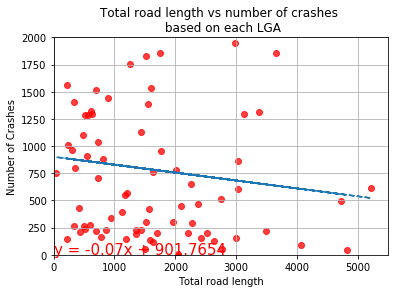

In [99]:
#calculate correlation coffecient

round(st.pearsonr(lga_stats["Total_roadlength"],lga_stats["OBJECTID"])[0],2)
x_values3 = lga_stats["Total_roadlength"]
y_values3 = lga_stats["OBJECTID"] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
print("slope", slope)
print("intercept", intercept)
print(x_values3 * slope + intercept)
regress_values = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,4))
print(line_eq)
plt.scatter(x_values3, y_values3, facecolors = "red", alpha = 0.75)
plt.plot(x_values3, regress_values,"--")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total road length')
plt.ylabel('Number of Crashes')
plt.title("Total road length vs number of crashes \n based on each LGA")
plt.xlim(0,5500)
plt.ylim(0,2000)
plt.grid()
plt.show()